# Next Step: Analyze a Second Asset and Its Correlation 🤝
We'll download data for a Gold ETF (ticker: GLD) and compare its behavior to the S&P 500 ETF (SPY) you've already analyzed. Gold is often used in portfolios because it can behave differently from the stock market.

1. Download Data for Both Assets
First, modify your yfinance call to download data for both 'SPY' and 'GLD' at the same time.

In [8]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import yfinance as yf
import numpy as np

# Define tickers and dates
tickers = ["SPY", "GLD"]
start_date = "2024-10-22"
end_date = "2025-10-22"

# Download the historical data
data = yf.download(tickers, start=start_date, end=end_date)

print("--- Downloaded Data Head ---")
print(data.head())

C:\Users\chuaw\AppData\Local\Temp\ipykernel_21092\1363766544.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  2 of 2 completed

--- Downloaded Data Head ---
Price            Close                    High                     Low  \
Ticker             GLD         SPY         GLD         SPY         GLD   
Date                                                                     
2024-10-22  253.929993  576.313477  253.940002  577.479296  252.520004   
2024-10-23  250.869995  571.047485  253.179993  574.722834  250.199997   
2024-10-24  252.800003  572.282410  253.320007  573.092567  251.399994   
2024-10-25  253.320007  572.084839  253.550003  577.439780  251.770004   
2024-10-28  253.330002  573.853455  253.630005  575.710878  252.949997   

Price                         Open               Volume            
Ticker             SPY         GLD         SPY      GLD       SPY  
Date                                                               
2024-10-22  573.408788  253.059998  574.070723  5756300  34183800  
2024-10-23  567.520359  253.080002  574.278227  8081000  49314600  
2024-10-24  569.644497  253.270004  57

In [4]:
data.columns

MultiIndex([( 'Close', 'GLD'),
            ( 'Close', 'SPY'),
            (  'High', 'GLD'),
            (  'High', 'SPY'),
            (   'Low', 'GLD'),
            (   'Low', 'SPY'),
            (  'Open', 'GLD'),
            (  'Open', 'SPY'),
            ('Volume', 'GLD'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])

# 2. Calculate and Compare Log Returns
Now, calculate the log returns for the 'Close' price of both assets.

In [2]:
# Isolate the 'Close' prices from the MultiIndex DataFrame
close_prices = data['Close']

# Calculate log returns for both tickers
log_returns = np.log(close_prices / close_prices.shift(1))

# Drop the first row which is NaN
log_returns = log_returns.dropna()

print("\n--- Log Returns ---")
print(log_returns.head())


--- Log Returns ---
Ticker           GLD       SPY
Date                          
2024-10-23 -0.012124 -0.009179
2024-10-24  0.007664  0.002160
2024-10-25  0.002055 -0.000345
2024-10-28  0.000039  0.003087
2024-10-29  0.010836  0.001617


# 2. Calculate and Compare Log Returns
Now, calculate the log returns for the 'Close' price of both assets.
<h2>What Your Results Mean</h2>
The output of the last step will be a correlation matrix. It will show you a number between -1 and 1 that describes how SPY and GLD returns are related.
<ul>Close to 1: The assets move in lockstep (e.g., when SPY goes up, GLD also tends to go up).</ul>

<ul>Close to 0: The assets have very little relationship; their movements are mostly independent.</ul>

<ul>Close to -1: The assets move in opposite directions (e.g., when SPY goes up, GLD tends to go down).</ul>

In [3]:
# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

print("\n--- Correlation Matrix ---")
print(correlation_matrix)


--- Correlation Matrix ---
Ticker       GLD       SPY
Ticker                    
GLD     1.000000  0.023569
SPY     0.023569  1.000000


Now that you have the individual returns, risks, and the correlation between SPY and GLD, the next step is to combine them into a single portfolio. This will let you see the power of diversification in action.

You'll calculate the expected return and risk for a portfolio with a specific mix of these two assets. This is the practical application of Modern Portfolio Theory.

Calculate Portfolio Risk and Return
Let's start with a simple, equally-weighted portfolio: 50% in SPY and 50% in GLD. We need to calculate the overall return and risk for this combination.

1. Define Weights and Calculate Individual Returns
First, define the weights and calculate the annualized returns for each asset, just as you did for SPY alone.

In [5]:
# Define portfolio weights
weights = np.array([0.5, 0.5]) # 50% SPY, 50% GLD

# Calculate annualized individual returns
annualized_returns = log_returns.mean() * 252

print("--- Annualized Individual Returns ---")
print(annualized_returns)

--- Annualized Individual Returns ---
Ticker
GLD    0.400592
SPY    0.154387
dtype: float64


# 2. Calculate Portfolio Return
The portfolio's return is simply the weighted average of the individual asset returns.

In [6]:
# Calculate portfolio return
portfolio_return = np.sum(annualized_returns * weights)

print(f"\nExpected Portfolio Return: {portfolio_return:.2%}")


Expected Portfolio Return: 27.75%


# 3. Calculate Portfolio Risk (Volatility)
Calculating portfolio risk is more complex because it must account for how the assets move together (their covariance). The formula for a two-asset portfolio's variance is:$$\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2Cov_{1,2}$$Thankfully, we can use matrix algebra to simplify this for any number of assets.

In [7]:
# Calculate the covariance matrix of the log returns
cov_matrix = log_returns.cov() * 252 # Annualize the covariance

# Calculate portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Calculate portfolio risk (standard deviation)
portfolio_risk = np.sqrt(portfolio_variance)

print(f"Portfolio Risk (Volatility): {portfolio_risk:.2%}")

Portfolio Risk (Volatility): 14.04%


# What This Tells You 💡
By running this code, you'll get the specific risk and return for a 50/50 portfolio. You will likely notice that the portfolio's risk is lower than the weighted average of the individual risks. This "magic" is the benefit of diversification, and it happens because the assets are not perfectly correlated.

The next exciting step is to realize that you can change the weights (e.g., 60/40, 70/30) and calculate the risk/return for each combination. Plotting all these possible portfolios creates the famous Efficient Frontier, which shows the best possible return you can get for any given level of risk.

# Let's create the Efficient Frontier. 
This is the final and most important visualization in Modern Portfolio Theory.

The Efficient Frontier is a curve that shows all the best possible portfolios you can create from a given set of assets. Any portfolio on the frontier gives you the highest possible return for its level of risk. 

Simulating Portfolios to Build the Frontier 📈
To create this curve, we'll simulate thousands of different portfolio weight combinations for SPY and GLD. For each combination, we'll calculate the portfolio's overall risk and return and then plot them on a graph.

Python Code
This code continues from your previous script. It will simulate 10,000 different portfolios, calculate their risk, return, and Sharpe Ratio, and then plot them all.

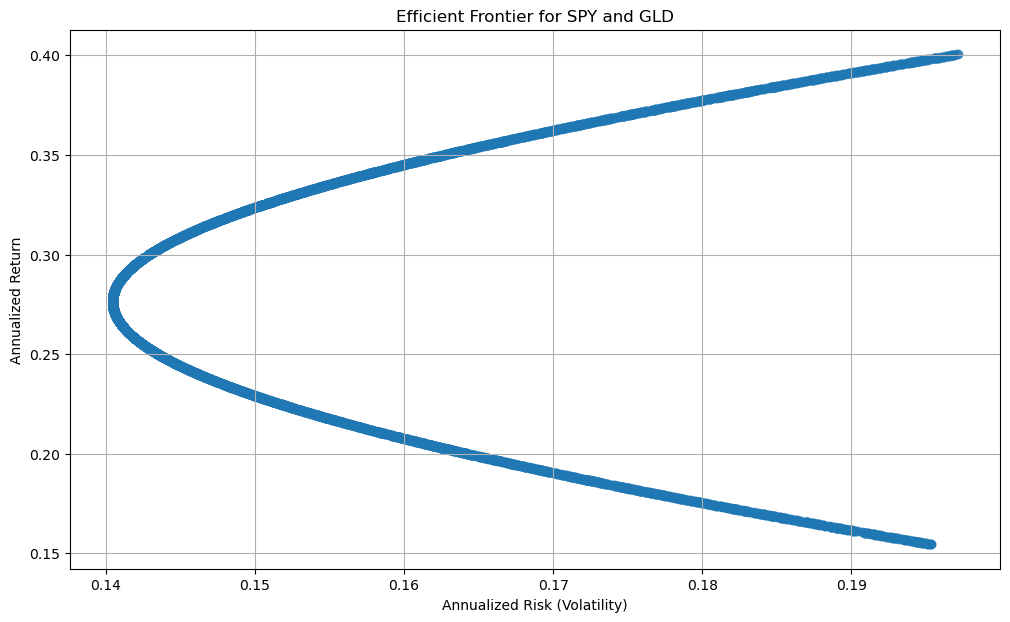

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- (Previous code for log_returns, cov_matrix, and annualized_returns) ---

# --- SIMULATION ---
# Set the number of portfolio simulations
num_portfolios = 10000

# Create empty lists to store our results
results = []
weights_list = []

for i in range(num_portfolios):
    # 1. Generate random weights that sum to 1
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_list.append(weights)

    # 2. Calculate portfolio return and risk for the current weights
    p_return = np.sum(annualized_returns * weights)
    p_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # 3. Store the results
    results.append([p_return, p_risk])

# Convert results list to a DataFrame
results_df = pd.DataFrame(results, columns=['Return', 'Risk'])

# --- PLOTTING ---
plt.figure(figsize=(12, 7))
plt.scatter(results_df['Risk'], results_df['Return'], alpha=0.5)
plt.title('Efficient Frontier for SPY and GLD')
plt.xlabel('Annualized Risk (Volatility)')
plt.ylabel('Annualized Return')
plt.grid(True)
plt.show()